In [1]:
# DSC 550
# Week 11 & 12
# FINAL PROJECT -  Original Case Study - Olympics
# Aaron Kuethe

# Install Packages

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import yellowbrick
import tensorflow as tf

In [2]:
# PART 1
# Load data into a dataframe and look at the data.

data = pd.read_csv("athlete_events.csv")
data.head()

# The data from the Olympic athletes csv has been loaded in.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Check the dimension of the table.
print("The dimension of the table is: ", data.shape)

# The dimension of the table is (271116, 15).

The dimension of the table is:  (271116, 15)


In [4]:
# Think about some questions that might help to determine which countries will have more success.

# -How many countries have participated in the Summer or Winter Olympics?
# -Has female participation in the Olympics grown?
# -Have country and event participation grown in the Olympics over the years?
# -Does the Summer or Winter Olympics have more events and country participation?
# -Which countries are more successful in Summer vs Winter?
# -What is the % of athletes participating versus medaling for a given country? For example, the USA seems to have the most 
# medals and participants every year, but are they the most efficient?
# -Does the host city improve the chances of medaling?

In [5]:
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.)

print("Describe Data")
print(data.describe())
print("")
print("")
print("")
print("")
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  




Summarized Data
                        Name     Sex           Team     NOC        Games  \
count                 271116  271116         271116  271116  

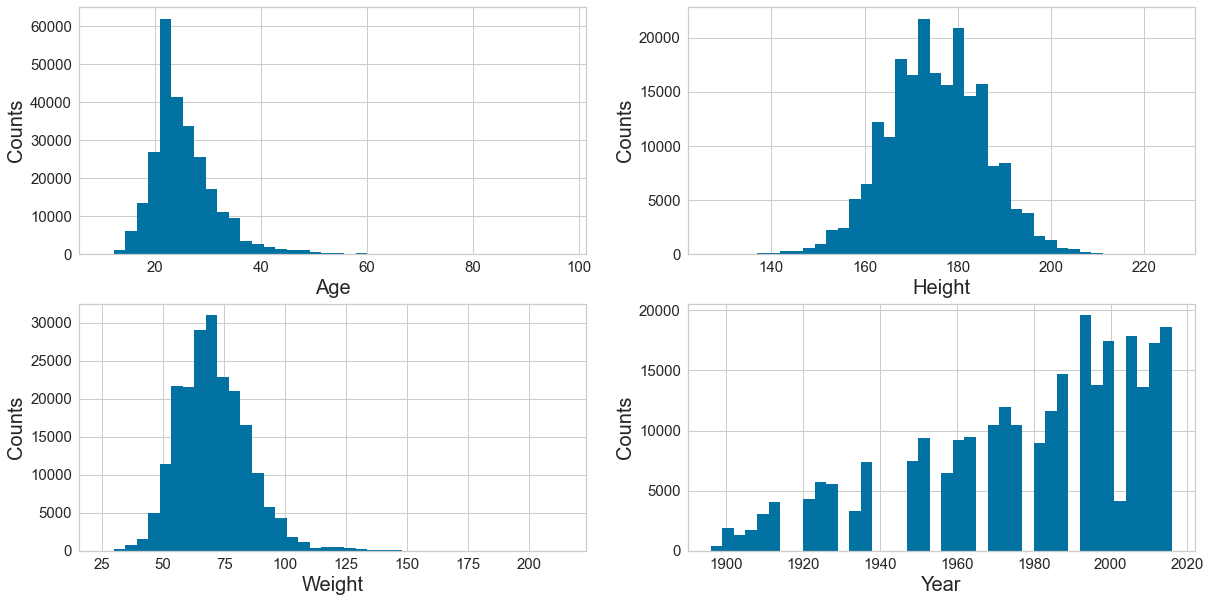

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'Height', 'Weight', 'Year']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

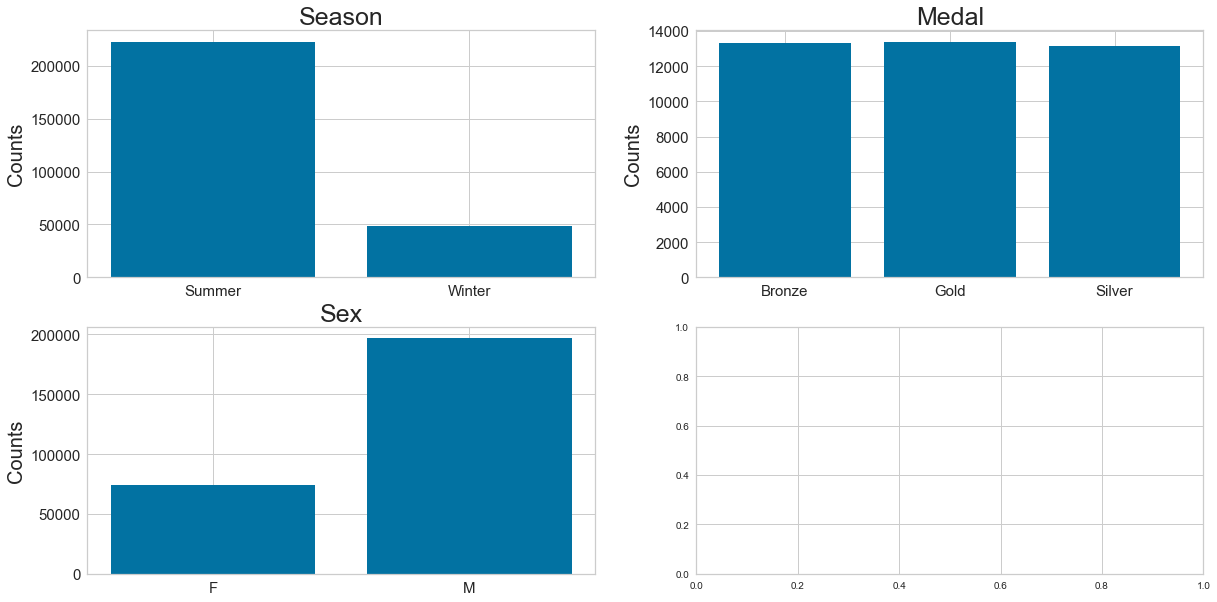

In [7]:
# Season and Sex only have 2 options, so they are represented in bar charts. There are 4 options for medals.

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Season = data.replace({'Season': {1: 'Summer', 0: 'Winter'}}).groupby('Season').size().reset_index(name='Counts')['Season']
Y_Season = data.replace({'Season': {1: 'Summer', 0: 'Winter'}}).groupby('Season').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Season, Y_Season)
axes[0, 0].set_title('Season', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Medal = data.replace({'Medal': {1: 'Gold', 2: 'Silver', 3: 'Bronze'}}).groupby('Medal').size().reset_index(name='Counts')['Medal']
Y_Medal = data.replace({'Medal': {1: 'Gold', 2: 'Silver', 3: 'Bronze'}}).groupby('Medal').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_Medal, Y_Medal)
axes[0, 1].set_title('Medal', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

In [8]:
# PART 2 FEATURE SELECTION & DIMENSIONALITY

# For feature selection, I first wanted to remove any columns that felt extraneous, which to me seemed to be the weight and
# height columns. I figured if the athletes are participating in the Olympics, they are most likely similarly built and
# therefore height and weight would be comparable for every athlete. For example, for boxing or wrestling, there are often
# weight classes that the athletes fall into. Or for gymnastics, most athletes are short. I will start by removing those 2
# columns from the data.

## UPDATE
# After some feedback from Professor Werner and classmates, I am going to refine my data a little bit more.
# As I am wanting to predict which countries have a better chance at winning medals, I do not need specific people or ID's.
# I also do not need the Games column as it summarizes the information from 2 other columns, Year and Season.
# I will now leave Height and Weight in the data.


data = data.drop(['ID', 'Name', 'Games'], axis = 1)

In [9]:
print("The dimension of the table is: ", data.shape)
data.head()

# The dimension of the table now shows 12 columns as opposed to 15, which proves that the Height and Weight are columns have 
# still in the data and ID, Name, and Games been removed.

The dimension of the table is:  (271116, 12)


,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [12]:
# Looking through the data, I noticed that there were NA's in a few columns. Insted of excluding those rows of data, because
# the athlete could have won a medal (so we want to keep these rows to not impact the overall data), I want to fill the age,
# height, and weight columns with the median values for the NA's.

# Metrics BEFORE:

print("BEFORE")
print("")
print("")
print("Age:")
print(data['Age'].describe())
print("")
print("")
print("Height:")
print(data['Height'].describe())
print("")
print("")
print("Weight:")
print(data['Weight'].describe())

BEFORE


Age:
count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


Height:
count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64


Weight:
count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64


In [14]:
# Fill the missing age, height, and weight data with median value

def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])
fill_na_median(data['Height'])
fill_na_median(data['Weight'])

# Age metrics AFTER:
print("AFTER")
print("")
print("")
print("Age:")
print(data['Age'].describe())
print("")
print("")
print("Height:")
print(data['Height'].describe())
print("")
print("")
print("Weight:")
print(data['Weight'].describe())

# Overall, not much changed, so maybe this would not have had much of an impact. It did add roughly rows of data back in,
# however the statistics did not change much since I used the median age to replace the NA's. While the NA's may not have been
# impacting the data that much, I will sleep better at night now knowing all records are included and are not impacting the
# results. Better safe than sorry.

AFTER


Age:
count    271116.000000
mean         25.502493
std           6.287361
min          10.000000
25%          22.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


Height:
count    271116.00000
mean        175.26374
std           9.27917
min         127.00000
25%         170.00000
50%         175.00000
75%         180.00000
max         226.00000
Name: Height, dtype: float64


Weight:
count    271116.000000
mean         70.539500
std          12.578184
min          25.000000
25%          63.000000
50%          70.000000
75%          75.000000
max         214.000000
Name: Weight, dtype: float64


In [12]:
# Changing gold, silver, and bronze medals to display a 1. So if anyone medaled, they would have a 1. If they did not medal,
# they are assigned a 0.

data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,175.0,70.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [14]:
# Encoding to create columns of data for every possible 

def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)
# Male and Summer season will be represented by 1s in the data, while Female and Winter season will be represented by 0s.

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

# A new column will be added for every team, NOC, City, Sport, and Event.

In [15]:
# Verifying that all the columns that will be used in the correlation calculation are numeric and not categorical.

print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


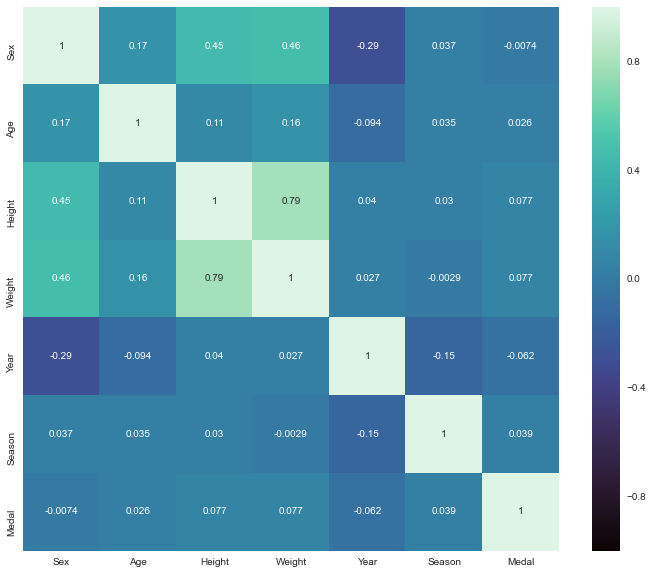

In [16]:
# Creating correlation chart

import seaborn as sns

corr = data.loc[:, :'Medal'].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [18]:
# PART 3

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
# Removing medal from the data and assigning it to X.

y = data['Medal'].copy()
X = data.drop('Medal', axis=1).copy()

In [20]:
# Splitting data into training and test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=100)

In [22]:
# Summarizing the training and test set.

print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in test set:", X_test.shape[0])

# Seeing how many medaled and did not medal
print('\n')
print('No. of medaled and non-medaled in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of medaled and non-medaled in the test set:')
print(y_test.value_counts())

No. of samples in training set:  176225
No. of samples in test set: 94891


No. of medaled and non-medaled in the training set:
0    150299
1     25926
Name: Medal, dtype: int64


No. of medaled and non-medaled in the test set:
0    81034
1    13857
Name: Medal, dtype: int64


In [23]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 14.7% / 85.3%


In [24]:
# Running model of predicting olympic winners. Fitting using keras.

inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
4406/4406 [==============================] - 9s 2ms/step - loss: 0.3649 - accuracy: 0.8592 - auc: 0.7555 - val_loss: 0.3050 - val_accuracy: 0.8850 - val_auc: 0.8371
Epoch 2/100
4406/4406 [==============================] - 5s 1ms/step - loss: 0.2819 - accuracy: 0.8913 - auc: 0.8639 - val_loss: 0.2819 - val_accuracy: 0.8954 - val_auc: 0.8604
Epoch 3/100
4406/4406 [==============================] - 5s 1ms/step - loss: 0.2501 - accuracy: 0.9029 - auc: 0.8959 - val_loss: 0.2683 - val_accuracy: 0.9009 - val_auc: 0.8738
Epoch 4/100
4406/4406 [==============================] - 5s 1ms/step - loss: 0.2230 - accuracy: 0.9137 - auc: 0.9176 - val_loss: 0.2633 - val_accuracy: 0.9051 - val_auc: 0.8820
Epoch 5/100
4406/4406 [==============================] - 5s 1ms/step - loss: 0.2063 - accuracy: 0.9203 - auc: 0.9306 - val_loss: 0.2534 - val_accuracy: 0.9113 - val_auc: 0.8894
Epoch 6/100
4406/4406 [==============================] - 5s 1ms/step - loss: 0.1888 - accuracy: 0.9262 - auc: 0.942

In [25]:
# Evaluating the test data.

model.evaluate(X_test, y_test)

2966/2966 [==============================] - 2s 752us/step - loss: 0.2500 - accuracy: 0.9139 - auc: 0.8917


[0.25001800060272217, 0.9138906598091125, 0.891653299331665]

In [27]:
# Summarizing the results of the model.

from sklearn.metrics import classification_report, confusion_matrix

y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int))

print("Classification Report:\n\n", classification_report(y_true, y_pred))
print("")
print("")
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# For non-medalers, the precision score is 0.92, the recall is 0.98, and the f1-score is 0.95.
# For medalers, the precision score is 0.82, the recall is 0.52, and the f1-score is 0.64.
# The precision, recall, and f1-scores were all very high for non-medalers, indicating this model is very good for predicting
# non-medalers.
# The precision, recall, and f1-scores weren't as high for medalers, indicating this model isn't as good for predicting
# medalers.

# The model correctly predicted 79,390 would not medal. The model said 1,644 would not medal, who did medal.
# The model correclty predicted 7,330 would medal. The model said 6,527 would medal, who ended up not medaling.
# Overall, 86,720 were correctly predicted out of 94,891. The model is 91.4% accurate. This model is great for predicting
# non-medalers, but not as good for predicting medalers. This could be due to the large discrepancy in medalers to non-medalers.

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.98      0.95     81034
           1       0.82      0.53      0.64     13857

    accuracy                           0.91     94891
   macro avg       0.87      0.75      0.80     94891
weighted avg       0.91      0.91      0.91     94891



Confusion Matrix:
 [[79390  1644]
 [ 6527  7330]]
